In [1]:
#import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import seaborn as sns

#import and read cleaned_2022
import pandas as pd
players_df = pd.read_csv("model_2022-2023.csv")
players_df.head()

,Unnamed: 0,position,games_played,minutes/game,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotAttempts,...,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_unblockedShotAttempts,Line_or_Pair
0,0,R,73,9.32,49.47,6.70,3.80,5,5,79,...,29,7,1.16,3.58,1.96,0,4,1,69,3rd line
1,1,D,68,15.01,37.10,1.36,1.83,6,6,78,...,2,0,1.09,0.28,0.00,1,1,0,52,3rd pair
2,2,D,61,13.04,69.79,2.44,3.85,1,2,140,...,5,0,1.98,0.46,0.00,2,0,0,102,3rd pair
3,3,D,42,14.02,32.17,1.21,1.81,2,4,79,...,1,0,1.13,0.08,0.00,1,1,0,47,3rd pair
4,4,C,28,16.00,39.69,6.81,2.85,5,4,65,...,14,10,1.07,1.73,4.02,1,2,4,53,2nd line


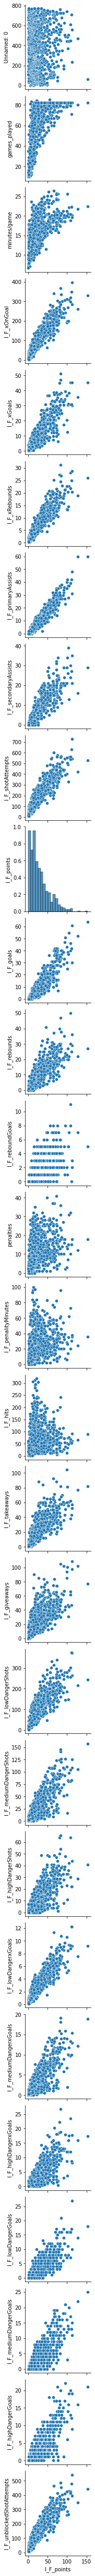

In [2]:
sns.pairplot(data = players_df,
             x_vars= ['I_F_points'])

In [3]:
players_df.drop(['Unnamed: 0', 'position', 'games_played', 'I_F_hits', 'penalties', 'I_F_penalityMinutes', 'I_F_reboundGoals', 'Line_or_Pair', 'I_F_goals', 'I_F_secondaryAssists', 'I_F_primaryAssists'], axis='columns',inplace=True)
players_df.head()

,minutes/game,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_shotAttempts,I_F_points,I_F_rebounds,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_unblockedShotAttempts
0,9.32,49.47,6.70,3.80,79,15,5,15,16,33,29,7,1.16,3.58,1.96,0,4,1,69
1,15.01,37.10,1.36,1.83,78,14,0,27,20,50,2,0,1.09,0.28,0.00,1,1,0,52
2,13.04,69.79,2.44,3.85,140,5,4,9,18,97,5,0,1.98,0.46,0.00,2,0,0,102
3,14.02,32.17,1.21,1.81,79,8,5,8,12,46,1,0,1.13,0.08,0.00,1,1,0,47
4,16.00,39.69,6.81,2.85,65,16,5,6,12,29,14,10,1.07,1.73,4.02,1,2,4,53


## Neural Network Model

In [4]:
#split data into features and target arrays
y = players_df.I_F_points.values
X = players_df.drop(columns='I_F_points').values

#split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
#create standardscaler instance
scaler = StandardScaler()

#fit the standardscaler
X_scaler = scaler.fit(X_train)

#scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="selu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="selu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="selu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="selu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 95        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile the model
nn.compile(loss="MeanSquaredError", optimizer="adam", metrics=["MeanAbsoluteError"])

In [8]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=525)

Epoch 1/525
19/19 [==============================] - 0s 1ms/step - loss: 473.3092 - mean_absolute_error: 14.4659
Epoch 2/525
19/19 [==============================] - 0s 778us/step - loss: 275.4152 - mean_absolute_error: 11.1543
Epoch 3/525
19/19 [==============================] - 0s 890us/step - loss: 181.4888 - mean_absolute_error: 9.6618
Epoch 4/525
19/19 [==============================] - 0s 834us/step - loss: 155.6505 - mean_absolute_error: 9.4467
Epoch 5/525
19/19 [==============================] - 0s 777us/step - loss: 147.2550 - mean_absolute_error: 9.1742
Epoch 6/525
19/19 [==============================] - 0s 779us/step - loss: 143.1452 - mean_absolute_error: 9.0100
Epoch 7/525
19/19 [==============================] - 0s 833us/step - loss: 139.7260 - mean_absolute_error: 8.8684
Epoch 8/525
19/19 [==============================] - 0s 778us/step - loss: 136.7953 - mean_absolute_error: 8.6660
Epoch 9/525
19/19 [==============================] - 0s 777us/step - loss: 130.3539 - me

In [9]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 44.0410 - mean_absolute_error: 4.7727 - 81ms/epoch - 12ms/step
Loss: 44.04104995727539, Accuracy: 4.772686958312988


In [10]:
# Save the model
nn.save("points_predictor_nn.h5")